<a href="https://colab.research.google.com/github/luqyz/ML/blob/main/Machine_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, Ridge

# read the CSV file using pandas
df = pd.read_csv('/content/drive/MyDrive/Dataset/Heart.csv')
print(df.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             

# Data Exploration

In [ ]:
print("Dataset shape:", df.shape)
print(df.info())
print(df.describe())

Dataset shape: (445132, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  H

In [ ]:
# Remove null values
df = df.dropna()
print(df.isnull().sum())

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [ ]:
from scipy.stats import chi2_contingency

# Variable to store all dependent columns
deps = []

# Performing chi-square test on each variable
for column in df:
  # Contingency table
  cont_table = pd.crosstab(df[column], df['HadHeartAttack'])

  # Test
  stat, p, d, exp = chi2_contingency(cont_table)
  a = 0.05

  if p <= a:
    # Dependent
    print(column)
    print(f'p-value = {p}')
    deps.append(column)

State
p-value = 2.2587903607765132e-72
Sex
p-value = 2.086026071340358e-289
GeneralHealth
p-value = 0.0
PhysicalHealthDays
p-value = 0.0
MentalHealthDays
p-value = 4.540413350732394e-118
LastCheckupTime
p-value = 1.1420838066710813e-268
PhysicalActivities
p-value = 0.0
SleepHours
p-value = 0.0
RemovedTeeth
p-value = 0.0
HadHeartAttack
p-value = 0.0
HadAngina
p-value = 0.0
HadStroke
p-value = 0.0
HadAsthma
p-value = 5.526035547516796e-32
HadSkinCancer
p-value = 1.850453342490879e-132
HadCOPD
p-value = 0.0
HadDepressiveDisorder
p-value = 7.295212028761504e-32
HadKidneyDisease
p-value = 0.0
HadArthritis
p-value = 0.0
HadDiabetes
p-value = 0.0
DeafOrHardOfHearing
p-value = 0.0
BlindOrVisionDifficulty
p-value = 1.799477104556634e-286
DifficultyConcentrating
p-value = 1.151407973094875e-144
DifficultyWalking
p-value = 0.0
DifficultyDressingBathing
p-value = 0.0
DifficultyErrands
p-value = 0.0
SmokerStatus
p-value = 0.0
ECigaretteUsage
p-value = 1.3352362106950711e-24
ChestScan
p-value = 0.0


In [ ]:
len(deps)

40

In [ ]:
heart = df[['Sex', 'AgeCategory',
                    'PhysicalActivities',
                    'AlcoholDrinkers',
                    'HadDiabetes',
                    'GeneralHealth',
                    'HadHeartAttack',
                    'HadStroke',
                    'ChestScan',
                    'HighRiskLastYear',
                    'SmokerStatus',
                    'PneumoVaxEver',
                    ]]

<Axes: xlabel='HadHeartAttack', ylabel='count'>

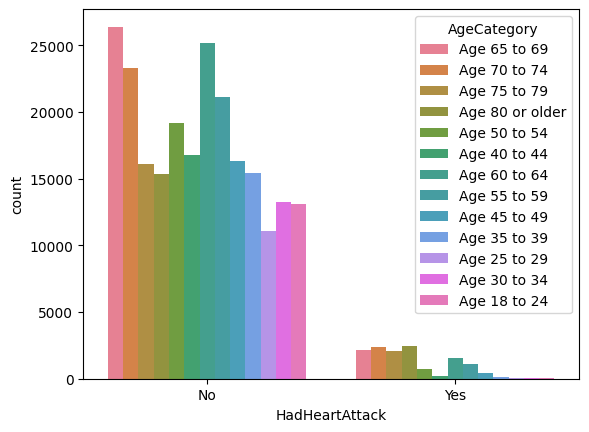

In [ ]:
sns.countplot(x='HadHeartAttack',hue='AgeCategory',data=heart)

<Axes: xlabel='HadHeartAttack', ylabel='count'>

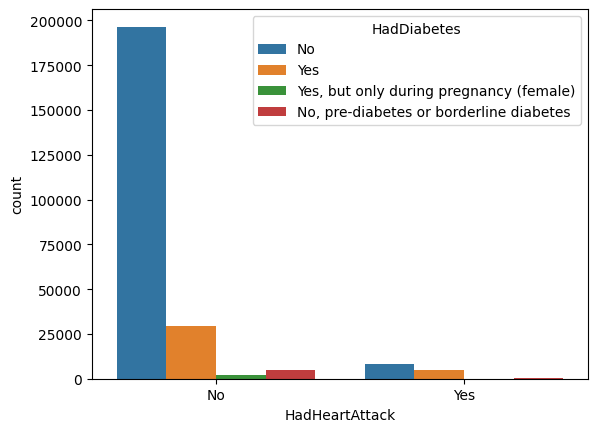

In [ ]:
sns.countplot(x='HadHeartAttack',hue='HadDiabetes',data=heart)

<Axes: xlabel='PneumoVaxEver', ylabel='count'>

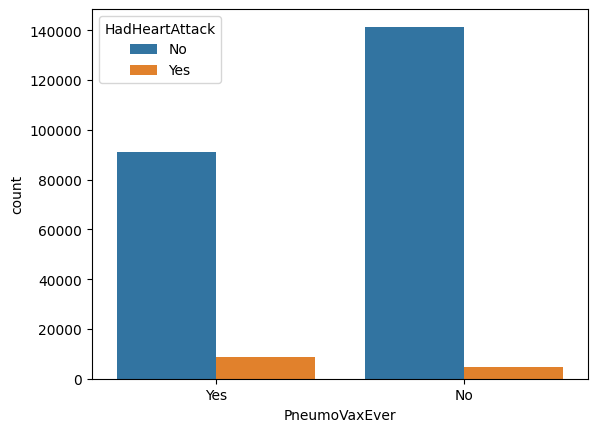

In [ ]:
sns.countplot(x='PneumoVaxEver',hue='HadHeartAttack',data=heart)

In [ ]:
uniques = {}

for column in heart:
  heart[column] = pd.factorize(heart.loc[:, column], sort=True)[0]

heart.head()

<ipython-input-32-478e04ece95a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart[column] = pd.factorize(heart.loc[:, column], sort=True)[0]
<ipython-input-32-478e04ece95a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart[column] = pd.factorize(heart.loc[:, column], sort=True)[0]
<ipython-input-32-478e04ece95a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Sex,AgeCategory,PhysicalActivities,AlcoholDrinkers,HadDiabetes,GeneralHealth,HadHeartAttack,HadStroke,ChestScan,HighRiskLastYear,SmokerStatus,PneumoVaxEver
342,0,9,1,0,0,4,0,0,0,0,2,1
343,1,10,1,0,2,4,0,0,0,0,2,1
345,1,11,0,1,0,4,0,0,1,0,2,1
346,0,12,1,0,0,1,0,0,0,0,3,1
347,0,12,1,0,0,2,0,0,0,0,3,1


<Axes: >

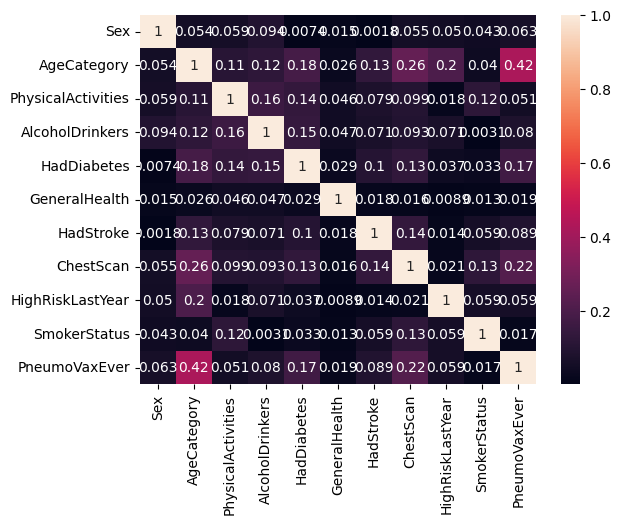

In [ ]:
# Select HadHeartAttack as dependent variable
X, y = heart, heart[['HadHeartAttack']]
X = X.drop(columns=['HadHeartAttack'])

# Show heatmap of each variable's correlation with each other
sns.heatmap(X.corr().abs(), annot=True)

In [ ]:
# Overall dataset
X, y = heart.drop(columns='HadHeartAttack'), heart[['HadHeartAttack']]

# Generating training and testing data from selected data
from sklearn.model_selection import train_test_split

# Using 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model
model = LogisticRegression(random_state=0) \
        .fit(X_train_scaled, y_train.values.ravel())
y_pred = model.predict(X_test_scaled)

In [ ]:
# Using score() from sklearn
print('Training score: ', model.score(X_train_scaled, y_train))
print('Testing score: ', model.score(X_test_scaled, y_test))

# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy score: %.3f' % accuracy_score(y_test, y_pred))

# Classification report (precision, recall, F1-score)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=True))

Training score:  0.9448015161291962
Testing score:  0.9467940249974596
Accuracy score: 0.947
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46591
           1       0.49      0.03      0.05      2614

    accuracy                           0.95     49205
   macro avg       0.72      0.51      0.51     49205
weighted avg       0.92      0.95      0.92     49205



[[46519    72]
 [ 2546    68]]


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

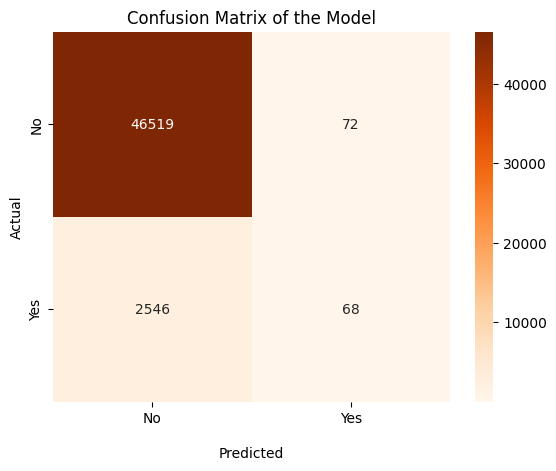

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

fig = sns.heatmap(matrix, annot=True, cmap='Oranges', fmt='g')

fig.set_title('Confusion Matrix of the Model')
fig.set_xlabel('\nPredicted')
fig.set_ylabel('Actual')

fig.set_xticklabels(['No', 'Yes'])
fig.set_yticklabels(['No', 'Yes'])